In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

from dateutil.parser import parse
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime as dt
import numpy as np
import math
from sklearn import preprocessing

In [8]:

df=pd.read_excel("Electricity-Demand-Time-Series-Analysis/DataSet/hourlyLoadDataIndia.xlsx")
print(df.head())
print(" ")

             datetime  National Hourly Demand  Northen Region Hourly Demand  \
0 2019-01-01 00:00:00               118690.67                      33692.02   
1 2019-01-01 01:00:00               116029.23                      32534.39   
2 2019-01-01 02:00:00               114044.14                      31730.37   
3 2019-01-01 03:00:00               113648.97                      31529.25   
4 2019-01-01 04:00:00               116290.05                      32406.61   

   Western Region Hourly Demand  Eastern Region Hourly Demand  \
0                      38522.22                      13128.89   
1                      38071.09                      12737.53   
2                      37680.10                      12387.36   
3                      37747.37                      12301.12   
4                      38101.80                      12479.13   

   Southern Region Hourly Demand  North-Eastern Region Hourly Demand  
0                       31681.83                             16

In [9]:
# Ensure datetime column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort by time
df = df.sort_values('datetime')

# Set it as index
df = df.set_index('datetime')

# Confirm
print(df.index.dtype)
print(df.index.min(), "→", df.index.max())


datetime64[ns]
2019-01-01 00:00:00 → 2024-04-30 23:00:00


In [10]:
print(df.isna().sum())

# Focus on target column
target_col = 'National Hourly Demand'
print(f"Missing in {target_col}: {df[target_col].isna().sum()} rows")

# Fill small gaps
df[target_col] = df[target_col].interpolate(method='time').fillna(method='ffill')


National Hourly Demand                0
Northen Region Hourly Demand          0
Western Region Hourly Demand          0
Eastern Region Hourly Demand          0
Southern Region Hourly Demand         0
North-Eastern Region Hourly Demand    0
dtype: int64
Missing in National Hourly Demand: 0 rows


/tmp/ipython-input-2278879022.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[target_col] = df[target_col].interpolate(method='time').fillna(method='ffill')


In [11]:
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df['year'] = df.index.year
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

df.head()


,National Hourly Demand,Northen Region Hourly Demand,Western Region Hourly Demand,Eastern Region Hourly Demand,Southern Region Hourly Demand,North-Eastern Region Hourly Demand,hour,weekday,month,year,is_weekend
datetime,,,,,,,,,,,
2019-01-01 00:00:00,118690.67,33692.02,38522.22,13128.89,31681.83,1665.72,0,1,1,2019,0
2019-01-01 01:00:00,116029.23,32534.39,38071.09,12737.53,31129.97,1556.24,1,1,1,2019,0
2019-01-01 02:00:00,114044.14,31730.37,37680.10,12387.36,30760.87,1485.44,2,1,1,2019,0
2019-01-01 03:00:00,113648.97,31529.25,37747.37,12301.12,30616.27,1454.96,3,1,1,2019,0
2019-01-01 04:00:00,116290.05,32406.61,38101.80,12479.13,31839.38,1463.14,4,1,1,2019,0


In [12]:
import numpy as np

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['month_sin'] = np.sin(2 * np.pi * (df['month'] - 1) / 12)
df['month_cos'] = np.cos(2 * np.pi * (df['month'] - 1) / 12)

df.head()


,National Hourly Demand,Northen Region Hourly Demand,Western Region Hourly Demand,Eastern Region Hourly Demand,Southern Region Hourly Demand,North-Eastern Region Hourly Demand,hour,weekday,month,year,is_weekend,hour_sin,hour_cos,month_sin,month_cos
datetime,,,,,,,,,,,,,,,
2019-01-01 00:00:00,118690.67,33692.02,38522.22,13128.89,31681.83,1665.72,0,1,1,2019,0,0.000000,1.000000,0.0,1.0
2019-01-01 01:00:00,116029.23,32534.39,38071.09,12737.53,31129.97,1556.24,1,1,1,2019,0,0.258819,0.965926,0.0,1.0
2019-01-01 02:00:00,114044.14,31730.37,37680.10,12387.36,30760.87,1485.44,2,1,1,2019,0,0.500000,0.866025,0.0,1.0
2019-01-01 03:00:00,113648.97,31529.25,37747.37,12301.12,30616.27,1454.96,3,1,1,2019,0,0.707107,0.707107,0.0,1.0
2019-01-01 04:00:00,116290.05,32406.61,38101.80,12479.13,31839.38,1463.14,4,1,1,2019,0,0.866025,0.500000,0.0,1.0


In [13]:
df['lag_1'] = df[target_col].shift(1)
df['lag_24'] = df[target_col].shift(24)
df['lag_168'] = df[target_col].shift(168)  # weekly lag

df['roll_3h_mean'] = df[target_col].rolling(3).mean()
df['roll_24h_mean'] = df[target_col].rolling(24).mean()
df['roll_168h_mean'] = df[target_col].rolling(168).mean()


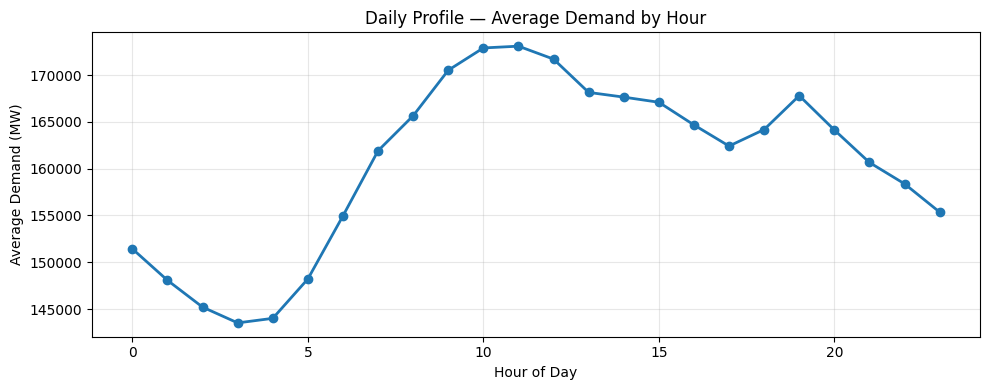

In [14]:
import matplotlib.pyplot as plt

daily_profile = df.groupby('hour')[target_col].mean()

plt.figure(figsize=(10, 4))
plt.plot(daily_profile.index, daily_profile.values, marker='o', linewidth=2)
plt.title('Daily Profile — Average Demand by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Demand (MW)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


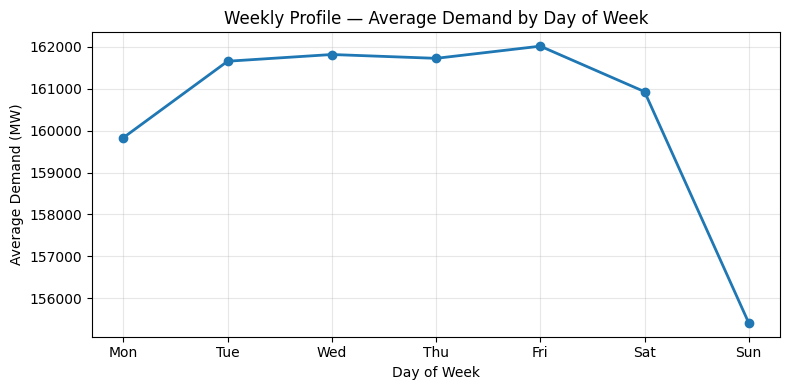

In [15]:
weekly_profile = df.groupby('weekday')[target_col].mean()
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(8, 4))
plt.plot(range(7), weekly_profile.values, marker='o', linewidth=2)
plt.xticks(range(7), weekday_labels)
plt.title('Weekly Profile — Average Demand by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Demand (MW)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3524018331.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df[target_col].resample('M').sum()


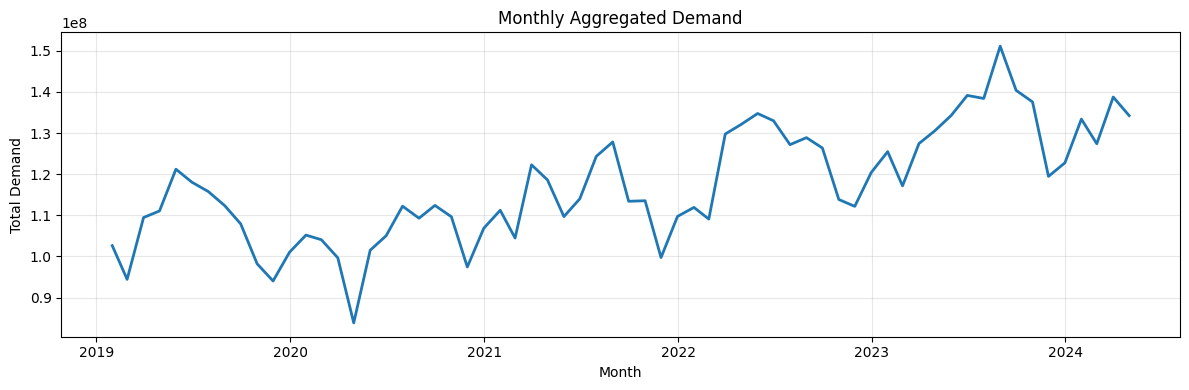

In [16]:
monthly = df[target_col].resample('M').sum()

plt.figure(figsize=(12, 4))
plt.plot(monthly.index, monthly.values, linewidth=2)
plt.title('Monthly Aggregated Demand')
plt.xlabel('Month')
plt.ylabel('Total Demand')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
